In [46]:
#importing libraries

import os
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron


Accuracy: 0.94
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


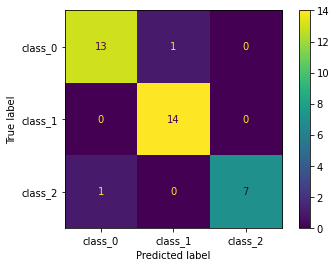

Accuracy: 0.97
[[13  1  0]
 [ 0 17  0]
 [ 0  0  5]]


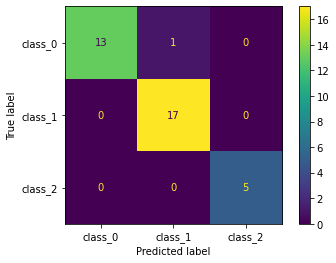

Accuracy: 0.86
[[ 9  1  0]
 [ 0 13  1]
 [ 0  3  9]]


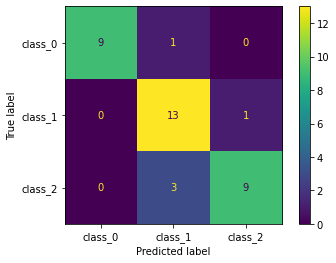

Accuracy: 0.92
[[13  1  0]
 [ 2 11  0]
 [ 0  0  9]]


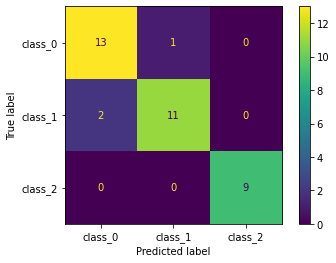

Accuracy: 0.94
[[10  1  0]
 [ 0 12  0]
 [ 0  1 11]]


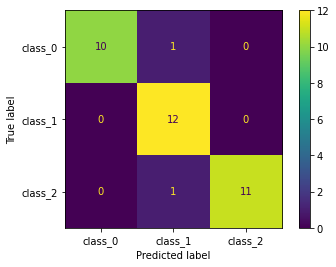

Accuracy: 0.91
[[10  0  0]
 [ 1 14  0]
 [ 0  2  8]]


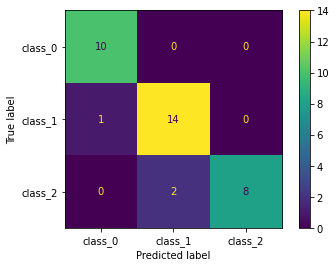

In [40]:
#Exercise 1

#loading wine dataset

wine = datasets.load_wine()

#data preparation with train_test split

X = wine.data
y = wine.target
variety = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier(criterion = 'gini')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.2f'%accuracy)

cm = confusion_matrix(y_test, y_pred)

print(cm)

CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = variety)
CM.plot()
plt.show()


#data preparation with kfold

model1 = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

data = KFold(n_splits = 5, shuffle = True)

for train_index, test_index in data.split(X,y):
    
    model1.fit(X[train_index], y[train_index])
    
    y_pred = model1.predict(X[test_index])
    
    accuracy = accuracy_score(y[test_index], y_pred)
    
    print('Accuracy: %.2f'%accuracy)
    
    cm = confusion_matrix(y[test_index], y_pred)

    print(cm)

    CM = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = variety)
    CM.plot()
    plt.show()

In [52]:
#Exercise 2

iris = datasets.load_iris()
X = iris.data
y = iris.target
variety = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model1 = Perceptron(max_iter=40,tol=0.001,eta0=1)

model1.fit(X_train_std, y_train)

y_pred = model1.predict(X_test_std)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy with standard scalar %.2f'%accuracy)

model = Perceptron(max_iter=40,tol=0.001,eta0=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy without standard scalar %.2f'%accuracy)

Accuracy with standard scalar 0.97
Accuracy without standard scalar 0.80
